In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

# Activity 1

In [2]:
# Load the input image in grayscale
img = cv.imread("images/boat.jpg", 0)

# Apply Otsu thresholding and invert the binary image
_, mask = cv.threshold(img, 0, 255, cv.THRESH_OTSU + cv.THRESH_BINARY_INV)

# Find contours in the thresholded image
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Loop through each contour and draw a bounding rectangle around it
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)

# Display the original image with bounding rectangles
cv.imshow("Boat", img)

# Wait for a key press and close all windows
cv.waitKey(0)
cv.destroyAllWindows()

# Activity 2

In [ ]:
def apply_morphology(image, kernel_size):
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (kernel_size, kernel_size))
    erosion = cv.erode(image, kernel, iterations=1)
    dilation = cv.dilate(image, kernel, iterations=1)
    opening = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
    return erosion, dilation, opening, closing

def on_trackbar(val):
    global kernel_size
    kernel_size = val
    erosion, dilation, opening, closing = apply_morphology(segmented_leaf, kernel_size)
    
    # Create a single image containing all transformations side by side
    transformed_image = np.hstack((erosion, dilation, opening, closing))
    
    # Display the transformed image
    cv.imshow('Morphological Transformations', transformed_image)

# Load the input image
image = cv.imread('images/leaf.jfif', cv.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply thresholding to segment the leaf
_, segmented_leaf = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Initialize GUI window
cv.namedWindow('Morphological Transformations')

# Create trackbar to control the size of structuring element
cv.createTrackbar('Kernel Size', 'Morphological Transformations', 1, 20, on_trackbar)

# Initial value
kernel_size = 1

# Display the initial transformations
on_trackbar(kernel_size)

while True:
    key = cv.waitKey(1) & 0xFF
    if key == 27:  # Press Esc to exit
        break

cv.destroyAllWindows()

# Activity 3

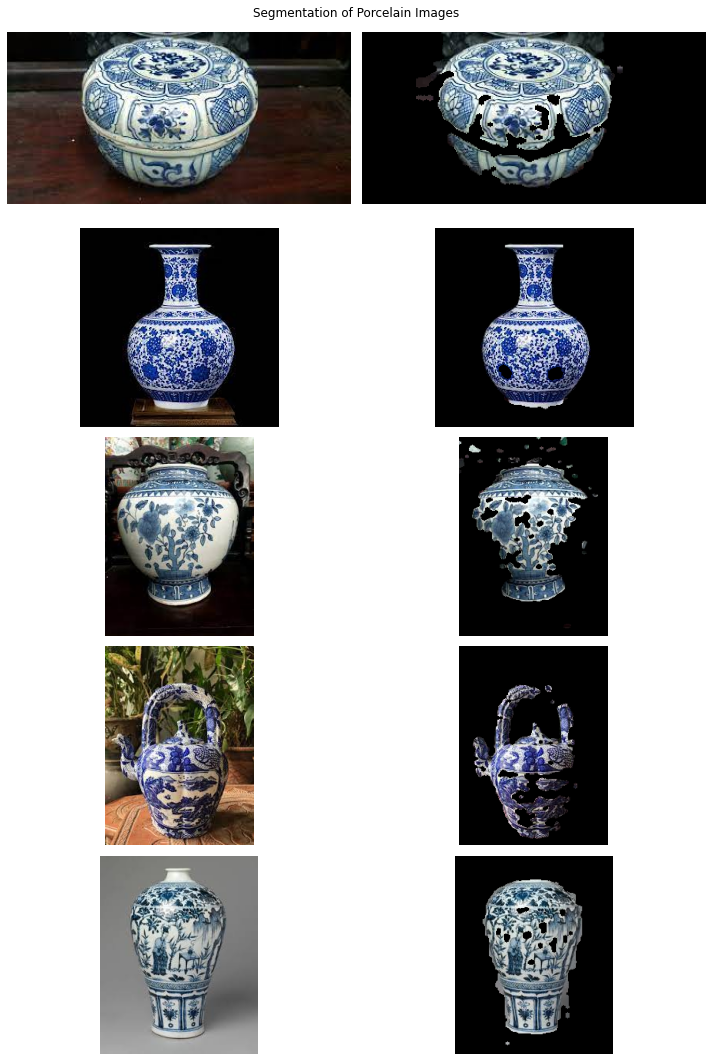

In [12]:
# Function to perform porcelain segmentation
def perform_porcelain_segmentation(image, lower_color_bound, upper_color_bound, apply_smoothing=True):
    original_image = image.copy()
    if apply_smoothing:
        image = cv.GaussianBlur(image, (5, 5), 0)
        
    # Convert the image to HSV color space
    hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
    
    # Create a binary mask using the specified color bounds
    mask = cv.inRange(hsv_image, lower_color_bound, upper_color_bound)
    
    # Apply morphological operations for refining segmentation
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
    mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
    
    # Apply the mask to the original image
    segmented_result = cv.bitwise_and(original_image, original_image, mask=mask)
    return segmented_result

# Define the lower and upper color bounds for porcelain
blue_color_lower_bound = (70, 5, 20)
blue_color_upper_bound = (180, 210, 255)

# Load porcelain images and perform segmentation
porcelain_images = []
for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    porcelain_images.append(img)

segmented_porcelain_images = [perform_porcelain_segmentation(img, blue_color_lower_bound, blue_color_upper_bound) for img in porcelain_images]

# Display original and segmented images
fig, ax = plt.subplots(5, 2, figsize=(10, 15))

for i in range(5):
    ax[i][0].imshow(porcelain_images[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(segmented_porcelain_images[i])
    ax[i][1].axis("off")
    
plt.suptitle("Segmentation of Porcelain Images")
plt.tight_layout()
plt.show()